#          Categorizing Kaggle Competitions by Degree of Difficulty

## Importing libraries

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('kaggle_scraped_00_final.csv')
df.head()

,title,price,launch,close,tags,teams,competitors,entries,description,files,size,points,tiers,difficulty
0,1st and Future - Player Contact Detection,"$100,000",2 days ago,NaN,"['health', 'tabular', 'football', 'video data'...",32,32,77,Goal of the Competition\nThe goal of this comp...,734 files,5.01 GB,This competition awards ranking points,This competition counts towards tiers,Featured Code Competition
1,Santa 2022 - The Christmas Card Conundrum,"$50,000",7 days ago,NaN,"['optimization', 'holidays and cultural events...",277,300,"1,078","This Christmas season, we’re printing in house...",3 files,10.04 MB,This competition awards ranking points,This competition counts towards tiers,Featured Prediction Competition
2,RSNA Screening Mammography Breast Cancer Detec...,"$50,000",9 days ago,NaN,"['binary classification', 'image classificatio...",259,280,"1,524",Goal of the Competition\nThe goal of this comp...,54713 files,314.72 GB,This competition awards ranking points,This competition counts towards tiers,Featured Code Competition
3,OTTO – Multi-Objective Recommender System,"$30,000",a month ago,NaN,"['retail and shopping', 'recommender systems',...","1,249","1,361","7,526",Goal of the Competition\nThe goal of this comp...,3 files,11.89 GB,This competition awards ranking points,This competition counts towards tiers,Featured Prediction Competition
4,Tabular Playground Series - Nov 2022,NaN,a month ago,7 days ago,"['tabular', 'ensembling', 'logloss']",689,717,"7,260",You may have heard that blending predictions f...,5002 files,2.9 GB,This competition did not award ranking points,This competition did not count towards tiers,Playground Prediction Competition


## Data Preprocessing

### Checking duplicates

In [5]:
df.duplicated()  

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [6]:
df.columns

Index(['title', 'price', 'launch', 'close', 'tags', 'teams', 'competitors',
       'entries', 'description', 'files', 'size', 'points', 'tiers',
       'difficulty'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        418 non-null    object
 1   price        275 non-null    object
 2   launch       405 non-null    object
 3   close        178 non-null    object
 4   tags         416 non-null    object
 5   teams        395 non-null    object
 6   competitors  392 non-null    object
 7   entries      361 non-null    object
 8   description  418 non-null    object
 9   files        395 non-null    object
 10  size         395 non-null    object
 11  points       395 non-null    object
 12  tiers        395 non-null    object
 13  difficulty   418 non-null    object
dtypes: object(14)
memory usage: 45.8+ KB


In [8]:
df['price']= df['price'].str.replace('$', '', regex =True) 
df['price']= df['price'].str.replace('€', '', regex =True)# replacing 
df['files']= df['files'].str.replace('files', '') 
df['size']= df['size'].str.replace('GB', '').str.replace('MB', '').str.replace('kB', '').str.replace('B', '')
df.head()

,title,price,launch,close,tags,teams,competitors,entries,description,files,size,points,tiers,difficulty
0,1st and Future - Player Contact Detection,"100,000",2 days ago,NaN,"['health', 'tabular', 'football', 'video data'...",32,32,77,Goal of the Competition\nThe goal of this comp...,734,5.01,This competition awards ranking points,This competition counts towards tiers,Featured Code Competition
1,Santa 2022 - The Christmas Card Conundrum,"50,000",7 days ago,NaN,"['optimization', 'holidays and cultural events...",277,300,"1,078","This Christmas season, we’re printing in house...",3,10.04,This competition awards ranking points,This competition counts towards tiers,Featured Prediction Competition
2,RSNA Screening Mammography Breast Cancer Detec...,"50,000",9 days ago,NaN,"['binary classification', 'image classificatio...",259,280,"1,524",Goal of the Competition\nThe goal of this comp...,54713,314.72,This competition awards ranking points,This competition counts towards tiers,Featured Code Competition
3,OTTO – Multi-Objective Recommender System,"30,000",a month ago,NaN,"['retail and shopping', 'recommender systems',...","1,249","1,361","7,526",Goal of the Competition\nThe goal of this comp...,3,11.89,This competition awards ranking points,This competition counts towards tiers,Featured Prediction Competition
4,Tabular Playground Series - Nov 2022,NaN,a month ago,7 days ago,"['tabular', 'ensembling', 'logloss']",689,717,"7,260",You may have heard that blending predictions f...,5002,2.9,This competition did not award ranking points,This competition did not count towards tiers,Playground Prediction Competition


###  Checking missing values

In [9]:
df.isnull().sum()   

title            0
price          143
launch          13
close          240
tags             2
teams           23
competitors     26
entries         57
description      0
files           23
size            23
points          23
tiers           23
difficulty       0
dtype: int64

### Handling missing values

In [10]:

df["price"] = df["price"].fillna(0)
df["launch"] = df["launch"].fillna(0)
df["close"] = df["close"].fillna(0)
df["tags"] = df["tags"].fillna(0)
df["teams"] = df["teams"].fillna(0)
df["competitors"] = df["competitors"].fillna(0)
df["entries"] = df["entries"].fillna(0)
df["files"] = df["files"].fillna(0)
df["size"] = df["size"].fillna(0)
df["points"] = df["points"].fillna(0)
df["tiers"] = df["tiers"].fillna(0)

In [11]:
look = df.isnull().sum()
look

title          0
price          0
launch         0
close          0
tags           0
teams          0
competitors    0
entries        0
description    0
files          0
size           0
points         0
tiers          0
difficulty     0
dtype: int64

In [12]:
df.head()

,title,price,launch,close,tags,teams,competitors,entries,description,files,size,points,tiers,difficulty
0,1st and Future - Player Contact Detection,"100,000",2 days ago,0,"['health', 'tabular', 'football', 'video data'...",32,32,77,Goal of the Competition\nThe goal of this comp...,734,5.01,This competition awards ranking points,This competition counts towards tiers,Featured Code Competition
1,Santa 2022 - The Christmas Card Conundrum,"50,000",7 days ago,0,"['optimization', 'holidays and cultural events...",277,300,"1,078","This Christmas season, we’re printing in house...",3,10.04,This competition awards ranking points,This competition counts towards tiers,Featured Prediction Competition
2,RSNA Screening Mammography Breast Cancer Detec...,"50,000",9 days ago,0,"['binary classification', 'image classificatio...",259,280,"1,524",Goal of the Competition\nThe goal of this comp...,54713,314.72,This competition awards ranking points,This competition counts towards tiers,Featured Code Competition
3,OTTO – Multi-Objective Recommender System,"30,000",a month ago,0,"['retail and shopping', 'recommender systems',...","1,249","1,361","7,526",Goal of the Competition\nThe goal of this comp...,3,11.89,This competition awards ranking points,This competition counts towards tiers,Featured Prediction Competition
4,Tabular Playground Series - Nov 2022,0,a month ago,7 days ago,"['tabular', 'ensembling', 'logloss']",689,717,"7,260",You may have heard that blending predictions f...,5002,2.9,This competition did not award ranking points,This competition did not count towards tiers,Playground Prediction Competition


### Finding number of tags 

In [13]:
temp=[]                       
for i in df['tags']:
    a=str(i)
    b = a.count(',')
    temp.append(b)

temp
    
nooftags = []
for i in temp:
    if i != 0:
        i+=1
        nooftags.append(i)
    else:
        nooftags.append(i)
        


### Adding new feature Number of Tags

In [14]:
df.insert(loc = 5, column="nooftags", value = nooftags)
df.head()

,title,price,launch,close,tags,nooftags,teams,competitors,entries,description,files,size,points,tiers,difficulty
0,1st and Future - Player Contact Detection,"100,000",2 days ago,0,"['health', 'tabular', 'football', 'video data'...",5,32,32,77,Goal of the Competition\nThe goal of this comp...,734,5.01,This competition awards ranking points,This competition counts towards tiers,Featured Code Competition
1,Santa 2022 - The Christmas Card Conundrum,"50,000",7 days ago,0,"['optimization', 'holidays and cultural events...",3,277,300,"1,078","This Christmas season, we’re printing in house...",3,10.04,This competition awards ranking points,This competition counts towards tiers,Featured Prediction Competition
2,RSNA Screening Mammography Breast Cancer Detec...,"50,000",9 days ago,0,"['binary classification', 'image classificatio...",3,259,280,"1,524",Goal of the Competition\nThe goal of this comp...,54713,314.72,This competition awards ranking points,This competition counts towards tiers,Featured Code Competition
3,OTTO – Multi-Objective Recommender System,"30,000",a month ago,0,"['retail and shopping', 'recommender systems',...",3,"1,249","1,361","7,526",Goal of the Competition\nThe goal of this comp...,3,11.89,This competition awards ranking points,This competition counts towards tiers,Featured Prediction Competition
4,Tabular Playground Series - Nov 2022,0,a month ago,7 days ago,"['tabular', 'ensembling', 'logloss']",3,689,717,"7,260",You may have heard that blending predictions f...,5002,2.9,This competition did not award ranking points,This competition did not count towards tiers,Playground Prediction Competition


In [15]:
df['launch'].unique()

array(['2 days ago', '7 days ago', '9 days ago', 'a month ago',
       '2 months ago', '3 months ago', '4 months ago', '5 months ago',
       '6 months ago', '7 months ago', '8 months ago', '9 months ago', 0,
       '10 months ago', 'a year ago', '2 years ago', '3 years ago',
       '4 years ago', '5 years ago', '6 years ago', '7 years ago',
       '8 years ago', '9 years ago', '10 years ago', '11 years ago',
       '12 years ago', '13 years ago'], dtype=object)

### Filtering the features 'launch' and 'close' in weeks

In [16]:
df['launch'].replace(['2 days ago','7 days ago','9 days ago','a month ago', '2 months ago', '3 months ago','4 months ago','5 months ago', '6 months ago', '7 months ago', '8 months ago','9 months ago','10 months ago'], [1,1,1,2,2,2,2,2,2,3,3,3,3], inplace=True)
df['launch'].replace(['a year ago', '2 years ago', '3 years ago', '4 years ago','5 years ago','6 years ago','7 years ago','8 years ago','9 years ago','10 years ago','11 years ago','12 years ago','13 years ago'], [4,4,4,4,4,4,5,5,5,5,5,5,5], inplace=True)
df['close'].replace(['7 days ago', '8 days', '10 days ago','13 days','a month','a month ago','2 months ago','3 months ago','4 months ago','5 months ago','6 months ago','7 months ago', '8 months ago','9 months ago','10 months ago','a year ago','2 years ago','3 years ago','4 years ago','5 years ago','6 years ago','7 years ago','8 years ago','9 years ago','10 years ago','11 years ago','12 years ago'], [1,1,1,1,2,2,2,2,2,2,2,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5], inplace=True)
df.head()

,title,price,launch,close,tags,nooftags,teams,competitors,entries,description,files,size,points,tiers,difficulty
0,1st and Future - Player Contact Detection,"100,000",1,0,"['health', 'tabular', 'football', 'video data'...",5,32,32,77,Goal of the Competition\nThe goal of this comp...,734,5.01,This competition awards ranking points,This competition counts towards tiers,Featured Code Competition
1,Santa 2022 - The Christmas Card Conundrum,"50,000",1,0,"['optimization', 'holidays and cultural events...",3,277,300,"1,078","This Christmas season, we’re printing in house...",3,10.04,This competition awards ranking points,This competition counts towards tiers,Featured Prediction Competition
2,RSNA Screening Mammography Breast Cancer Detec...,"50,000",1,0,"['binary classification', 'image classificatio...",3,259,280,"1,524",Goal of the Competition\nThe goal of this comp...,54713,314.72,This competition awards ranking points,This competition counts towards tiers,Featured Code Competition
3,OTTO – Multi-Objective Recommender System,"30,000",2,0,"['retail and shopping', 'recommender systems',...",3,"1,249","1,361","7,526",Goal of the Competition\nThe goal of this comp...,3,11.89,This competition awards ranking points,This competition counts towards tiers,Featured Prediction Competition
4,Tabular Playground Series - Nov 2022,0,2,1,"['tabular', 'ensembling', 'logloss']",3,689,717,"7,260",You may have heard that blending predictions f...,5002,2.9,This competition did not award ranking points,This competition did not count towards tiers,Playground Prediction Competition


### Converting to numerical type

In [17]:
df['size'] = df['size'].astype(float, errors = 'raise')
df['price'] = df['price'].str.strip()
df['price'] = df['price'].replace(',','', regex=True)
df['price'] = df['price'].astype(float, errors = 'raise')
df['teams'] = df['teams'].replace(',','', regex=True)
df['teams'] = df['teams'].astype(float, errors = 'raise')
df['competitors'] = df['competitors'].replace(',','', regex=True)
df['competitors'] = df['competitors'].astype(float, errors = 'raise')
df['entries'] = df['entries'].replace(',','', regex=True)
df['entries'] = df['entries'].astype(float, errors = 'raise')
df['files'] = df['files'].astype(float, errors = 'raise')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        418 non-null    object 
 1   price        275 non-null    float64
 2   launch       418 non-null    int64  
 3   close        418 non-null    int64  
 4   tags         418 non-null    object 
 5   nooftags     418 non-null    int64  
 6   teams        418 non-null    float64
 7   competitors  418 non-null    float64
 8   entries      418 non-null    float64
 9   description  418 non-null    object 
 10  files        418 non-null    float64
 11  size         418 non-null    float64
 12  points       418 non-null    object 
 13  tiers        418 non-null    object 
 14  difficulty   418 non-null    object 
dtypes: float64(6), int64(3), object(6)
memory usage: 49.1+ KB


In [19]:
df.head()

,title,price,launch,close,tags,nooftags,teams,competitors,entries,description,files,size,points,tiers,difficulty
0,1st and Future - Player Contact Detection,100000.0,1,0,"['health', 'tabular', 'football', 'video data'...",5,32.0,32.0,77.0,Goal of the Competition\nThe goal of this comp...,734.0,5.01,This competition awards ranking points,This competition counts towards tiers,Featured Code Competition
1,Santa 2022 - The Christmas Card Conundrum,50000.0,1,0,"['optimization', 'holidays and cultural events...",3,277.0,300.0,1078.0,"This Christmas season, we’re printing in house...",3.0,10.04,This competition awards ranking points,This competition counts towards tiers,Featured Prediction Competition
2,RSNA Screening Mammography Breast Cancer Detec...,50000.0,1,0,"['binary classification', 'image classificatio...",3,259.0,280.0,1524.0,Goal of the Competition\nThe goal of this comp...,54713.0,314.72,This competition awards ranking points,This competition counts towards tiers,Featured Code Competition
3,OTTO – Multi-Objective Recommender System,30000.0,2,0,"['retail and shopping', 'recommender systems',...",3,1249.0,1361.0,7526.0,Goal of the Competition\nThe goal of this comp...,3.0,11.89,This competition awards ranking points,This competition counts towards tiers,Featured Prediction Competition
4,Tabular Playground Series - Nov 2022,NaN,2,1,"['tabular', 'ensembling', 'logloss']",3,689.0,717.0,7260.0,You may have heard that blending predictions f...,5002.0,2.90,This competition did not award ranking points,This competition did not count towards tiers,Playground Prediction Competition


In [20]:
df["price"] = df["price"].fillna(0)
df.head()

,title,price,launch,close,tags,nooftags,teams,competitors,entries,description,files,size,points,tiers,difficulty
0,1st and Future - Player Contact Detection,100000.0,1,0,"['health', 'tabular', 'football', 'video data'...",5,32.0,32.0,77.0,Goal of the Competition\nThe goal of this comp...,734.0,5.01,This competition awards ranking points,This competition counts towards tiers,Featured Code Competition
1,Santa 2022 - The Christmas Card Conundrum,50000.0,1,0,"['optimization', 'holidays and cultural events...",3,277.0,300.0,1078.0,"This Christmas season, we’re printing in house...",3.0,10.04,This competition awards ranking points,This competition counts towards tiers,Featured Prediction Competition
2,RSNA Screening Mammography Breast Cancer Detec...,50000.0,1,0,"['binary classification', 'image classificatio...",3,259.0,280.0,1524.0,Goal of the Competition\nThe goal of this comp...,54713.0,314.72,This competition awards ranking points,This competition counts towards tiers,Featured Code Competition
3,OTTO – Multi-Objective Recommender System,30000.0,2,0,"['retail and shopping', 'recommender systems',...",3,1249.0,1361.0,7526.0,Goal of the Competition\nThe goal of this comp...,3.0,11.89,This competition awards ranking points,This competition counts towards tiers,Featured Prediction Competition
4,Tabular Playground Series - Nov 2022,0.0,2,1,"['tabular', 'ensembling', 'logloss']",3,689.0,717.0,7260.0,You may have heard that blending predictions f...,5002.0,2.90,This competition did not award ranking points,This competition did not count towards tiers,Playground Prediction Competition


### Filtering the difficulty feature

In [21]:
df.difficulty.unique()

array(['Featured Code Competition', 'Featured Prediction Competition',
       'Playground Prediction Competition', 'Analytics Competition',
       'Research Prediction Competition',
       'Playground Simulation Competition', 'Research Code Competition',
       'Featured Simulation Competition',
       'Getting Started Prediction Competition',
       'Playground Code Competition', 'Getting Started Code Competition',
       'Getting Started Simulation Competition',
       'Recruitment Prediction Competition',
       'Masters Prediction Competition',
       'GE Quests Prediction Competition',
       'Prospect Prediction Competition'], dtype=object)

In [22]:
#filter
df_data_list =['Featured Prediction Competition',
       'Playground Prediction Competition', 
       'Research Prediction Competition',
       'Playground Simulation Competition', 'Featured Code Competition',
       'Research Code Competition', 'Featured Simulation Competition',
       'GettingStarted Prediction Competition',
       'Playground Code Competition', 'GettingStarted Code Competition',
       'GettingStarted Simulation Competition']

In [23]:
df_sv = df[df.difficulty.isin(df_data_list)]
df_sv.head()

,title,price,launch,close,tags,nooftags,teams,competitors,entries,description,files,size,points,tiers,difficulty
0,1st and Future - Player Contact Detection,100000.0,1,0,"['health', 'tabular', 'football', 'video data'...",5,32.0,32.0,77.0,Goal of the Competition\nThe goal of this comp...,734.0,5.01,This competition awards ranking points,This competition counts towards tiers,Featured Code Competition
1,Santa 2022 - The Christmas Card Conundrum,50000.0,1,0,"['optimization', 'holidays and cultural events...",3,277.0,300.0,1078.0,"This Christmas season, we’re printing in house...",3.0,10.04,This competition awards ranking points,This competition counts towards tiers,Featured Prediction Competition
2,RSNA Screening Mammography Breast Cancer Detec...,50000.0,1,0,"['binary classification', 'image classificatio...",3,259.0,280.0,1524.0,Goal of the Competition\nThe goal of this comp...,54713.0,314.72,This competition awards ranking points,This competition counts towards tiers,Featured Code Competition
3,OTTO – Multi-Objective Recommender System,30000.0,2,0,"['retail and shopping', 'recommender systems',...",3,1249.0,1361.0,7526.0,Goal of the Competition\nThe goal of this comp...,3.0,11.89,This competition awards ranking points,This competition counts towards tiers,Featured Prediction Competition
4,Tabular Playground Series - Nov 2022,0.0,2,1,"['tabular', 'ensembling', 'logloss']",3,689.0,717.0,7260.0,You may have heard that blending predictions f...,5002.0,2.90,This competition did not award ranking points,This competition did not count towards tiers,Playground Prediction Competition


In [24]:
df_sv.shape

(376, 15)

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
df_sv["points"].unique()

array(['This competition awards ranking points',
       'This competition did not award ranking points',
       'This competition does not award ranking points',
       'This competition awarded ranking points',
       'This competition awarded 0.5X ranking points', 0,
       'This competition awarded 0.25X ranking points'], dtype=object)

In [27]:
def get_label(check):
    if check == "This competition does not award ranking points" or check == "This competition did not award ranking points":
        return 0
    if check == "This competition awarded 0.5X ranking points":
        return 1
    if check == "This competition awards ranking points" or check =="This competition awarded ranking points" :
        return 2

df_sv['points'] = df_sv.apply(lambda row: get_label(row['points']), axis = 1)


In [28]:
def get_label_(temp):
    if temp == "This competition does not count towards tiers" or temp == "This competition counted towards tiers":
        return 0
    if temp == "This competition counts towards tiers" or temp =="This competition counted towards tiers" :
        return 1

df_sv['tiers'] = df_sv.apply(lambda row: get_label_(row['tiers']), axis = 1)

In [29]:
df_sv['points']=df_sv['points'].fillna(0)
df_sv['tiers']=df_sv['tiers'].fillna(0)
df_sv.isnull().sum()

title          0
price          0
launch         0
close          0
tags           0
nooftags       0
teams          0
competitors    0
entries        0
description    0
files          0
size           0
points         0
tiers          0
difficulty     0
dtype: int64

In [30]:
df_sv

,title,price,launch,close,tags,nooftags,teams,competitors,entries,description,files,size,points,tiers,difficulty
0,1st and Future - Player Contact Detection,100000.0,1,0,"['health', 'tabular', 'football', 'video data'...",5,32.0,32.0,77.0,Goal of the Competition\nThe goal of this comp...,734.0,5.01,2.0,1.0,Featured Code Competition
1,Santa 2022 - The Christmas Card Conundrum,50000.0,1,0,"['optimization', 'holidays and cultural events...",3,277.0,300.0,1078.0,"This Christmas season, we’re printing in house...",3.0,10.04,2.0,1.0,Featured Prediction Competition
2,RSNA Screening Mammography Breast Cancer Detec...,50000.0,1,0,"['binary classification', 'image classificatio...",3,259.0,280.0,1524.0,Goal of the Competition\nThe goal of this comp...,54713.0,314.72,2.0,1.0,Featured Code Competition
3,OTTO – Multi-Objective Recommender System,30000.0,2,0,"['retail and shopping', 'recommender systems',...",3,1249.0,1361.0,7526.0,Goal of the Competition\nThe goal of this comp...,3.0,11.89,2.0,1.0,Featured Prediction Competition
4,Tabular Playground Series - Nov 2022,0.0,2,1,"['tabular', 'ensembling', 'logloss']",3,689.0,717.0,7260.0,You may have heard that blending predictions f...,5002.0,2.90,0.0,0.0,Playground Prediction Competition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,Tourism Forecasting Part Two,500.0,5,5,['custom metric'],0,42.0,46.0,695.0,Tourism is one of the most rapidly growing glo...,2.0,911.34,1.0,0.0,Featured Prediction Competition
414,Tourism Forecasting Part One,500.0,5,5,['custom metric'],0,55.0,60.0,477.0,Tourism is one of the most rapidly growing glo...,3.0,101.23,1.0,0.0,Featured Prediction Competition
415,Chess ratings - Elo versus the Rest of the World,617.0,5,5,['rmse'],0,252.0,262.0,3228.0,"When predicting the outcome of chess games, yo...",4.0,1.32,2.0,0.0,Featured Prediction Competition
416,INFORMS Data Mining Contest 2010,0.0,5,5,['auc'],0,145.0,153.0,1483.0,"Traders, analysts, investors and hedge funds a...",2.0,14.72,2.0,0.0,Featured Prediction Competition


In [31]:
df_sv['difficulty'] = df_sv.apply(lambda row: row['difficulty'].split()[0], axis = 1)
df_sv.head()

,title,price,launch,close,tags,nooftags,teams,competitors,entries,description,files,size,points,tiers,difficulty
0,1st and Future - Player Contact Detection,100000.0,1,0,"['health', 'tabular', 'football', 'video data'...",5,32.0,32.0,77.0,Goal of the Competition\nThe goal of this comp...,734.0,5.01,2.0,1.0,Featured
1,Santa 2022 - The Christmas Card Conundrum,50000.0,1,0,"['optimization', 'holidays and cultural events...",3,277.0,300.0,1078.0,"This Christmas season, we’re printing in house...",3.0,10.04,2.0,1.0,Featured
2,RSNA Screening Mammography Breast Cancer Detec...,50000.0,1,0,"['binary classification', 'image classificatio...",3,259.0,280.0,1524.0,Goal of the Competition\nThe goal of this comp...,54713.0,314.72,2.0,1.0,Featured
3,OTTO – Multi-Objective Recommender System,30000.0,2,0,"['retail and shopping', 'recommender systems',...",3,1249.0,1361.0,7526.0,Goal of the Competition\nThe goal of this comp...,3.0,11.89,2.0,1.0,Featured
4,Tabular Playground Series - Nov 2022,0.0,2,1,"['tabular', 'ensembling', 'logloss']",3,689.0,717.0,7260.0,You may have heard that blending predictions f...,5002.0,2.90,0.0,0.0,Playground


In [32]:
def get_label(cat):
    if cat == 'GettingStarted':
        return 0
    if cat == 'Playground'or cat == 'Research':
        return 1
    if cat == 'Featured':
        return 2

In [33]:
df_sv['difficulty'] = df_sv.apply(lambda row: get_label(row['difficulty']), axis = 1)
df_sv.head()

,title,price,launch,close,tags,nooftags,teams,competitors,entries,description,files,size,points,tiers,difficulty
0,1st and Future - Player Contact Detection,100000.0,1,0,"['health', 'tabular', 'football', 'video data'...",5,32.0,32.0,77.0,Goal of the Competition\nThe goal of this comp...,734.0,5.01,2.0,1.0,2
1,Santa 2022 - The Christmas Card Conundrum,50000.0,1,0,"['optimization', 'holidays and cultural events...",3,277.0,300.0,1078.0,"This Christmas season, we’re printing in house...",3.0,10.04,2.0,1.0,2
2,RSNA Screening Mammography Breast Cancer Detec...,50000.0,1,0,"['binary classification', 'image classificatio...",3,259.0,280.0,1524.0,Goal of the Competition\nThe goal of this comp...,54713.0,314.72,2.0,1.0,2
3,OTTO – Multi-Objective Recommender System,30000.0,2,0,"['retail and shopping', 'recommender systems',...",3,1249.0,1361.0,7526.0,Goal of the Competition\nThe goal of this comp...,3.0,11.89,2.0,1.0,2
4,Tabular Playground Series - Nov 2022,0.0,2,1,"['tabular', 'ensembling', 'logloss']",3,689.0,717.0,7260.0,You may have heard that blending predictions f...,5002.0,2.90,0.0,0.0,1


## Exploratory Data Analysis

In [32]:
num_data=df_sv.select_dtypes(exclude='object')
num_data.columns

Index(['price', 'launch', 'close', 'nooftags', 'teams', 'competitors',
       'entries', 'files', 'size', 'points', 'tiers', 'difficulty'],
      dtype='object')

### Histogram plots for the features

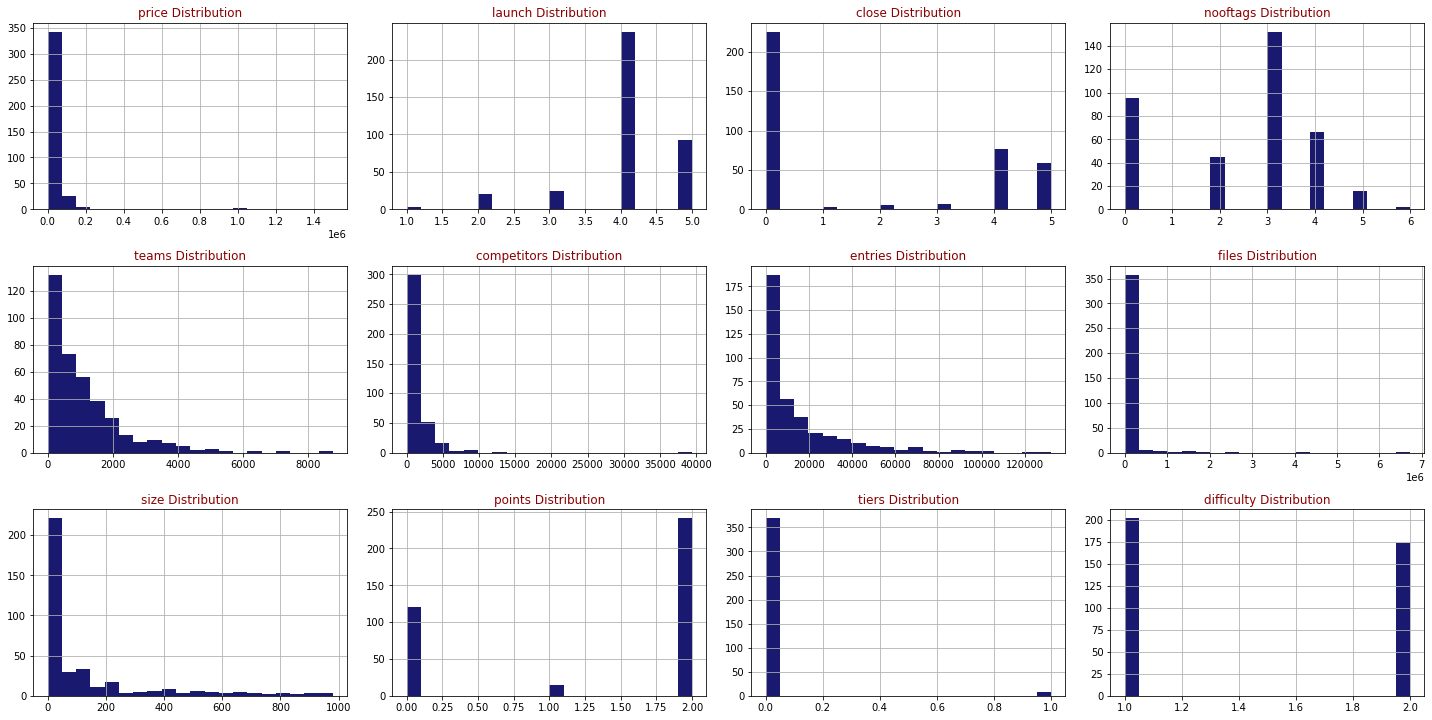

In [33]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        #ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(df_sv,num_data.columns,6,4)

## Pie chart of distribution of difficulty feature

Pie Chart:


Text(0.5, 1.0, 'Difficulty Level distribution')

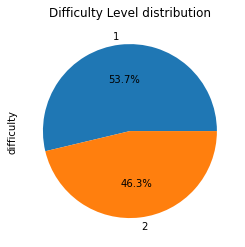

In [34]:
print("Pie Chart:")
df_sorted = df_sv.sort_values('difficulty')
graph_1 = pd.value_counts(df_sorted['difficulty'],sort=False)
graph_1.plot(kind = 'pie',autopct='%1.1f%%')
plt.title("Difficulty Level distribution")

In [35]:
df_diff_0 = df_sv[df_sv['difficulty'] == 0]
df_diff_1 = df_sv[df_sv['difficulty'] == 1] 
df_diff_2 = df_sv[df_sv['difficulty'] == 2]

In [36]:
df_diff_2

,title,price,launch,close,tags,nooftags,teams,competitors,entries,description,files,size,points,tiers,difficulty
0,1st and Future - Player Contact Detection,100000.0,1,0,"['health', 'tabular', 'football', 'video data'...",5,32.0,32.0,77.0,Goal of the Competition\nThe goal of this comp...,734.0,5.01,2.0,1.0,2
1,Santa 2022 - The Christmas Card Conundrum,50000.0,1,0,"['optimization', 'holidays and cultural events...",3,277.0,300.0,1078.0,"This Christmas season, we’re printing in house...",3.0,10.04,2.0,1.0,2
2,RSNA Screening Mammography Breast Cancer Detec...,50000.0,1,0,"['binary classification', 'image classificatio...",3,259.0,280.0,1524.0,Goal of the Competition\nThe goal of this comp...,54713.0,314.72,2.0,1.0,2
3,OTTO – Multi-Objective Recommender System,30000.0,2,0,"['retail and shopping', 'recommender systems',...",3,1249.0,1361.0,7526.0,Goal of the Competition\nThe goal of this comp...,3.0,11.89,2.0,1.0,2
11,Novozymes Enzyme Stability Prediction,25000.0,2,0,"['chemistry', 'spearmanr']",2,1892.0,2125.0,27508.0,Goal of the Competition\nEnzymes are proteins ...,5.0,16.36,2.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,Tourism Forecasting Part Two,500.0,5,5,['custom metric'],0,42.0,46.0,695.0,Tourism is one of the most rapidly growing glo...,2.0,911.34,1.0,0.0,2
414,Tourism Forecasting Part One,500.0,5,5,['custom metric'],0,55.0,60.0,477.0,Tourism is one of the most rapidly growing glo...,3.0,101.23,1.0,0.0,2
415,Chess ratings - Elo versus the Rest of the World,617.0,5,5,['rmse'],0,252.0,262.0,3228.0,"When predicting the outcome of chess games, yo...",4.0,1.32,2.0,0.0,2
416,INFORMS Data Mining Contest 2010,0.0,5,5,['auc'],0,145.0,153.0,1483.0,"Traders, analysts, investors and hedge funds a...",2.0,14.72,2.0,0.0,2


### Plots of level of difficulty vs other features

  Levels of Difficulty  Average Prize Money
0                 Easy                  NaN
1               Medium          7025.148515
2                 Hard         66693.201149


<function matplotlib.pyplot.show(close=None, block=None)>

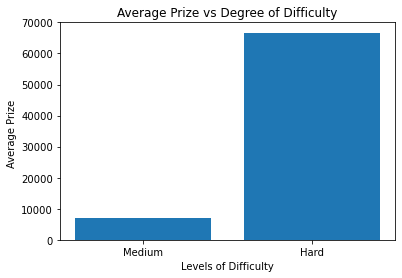

In [37]:
lvl0_price_avg = df_diff_0['price'].mean()
lvl1_price_avg = df_diff_1['price'].mean()
lvl2_price_avg = df_diff_2['price'].mean()

data_price = {'Levels of Difficulty': ['Easy','Medium','Hard'],
        'Average Prize Money': [lvl0_price_avg,lvl1_price_avg,lvl2_price_avg]}
df_avg_price = pd.DataFrame(data_price)
print(df_avg_price)
plt.bar(df_avg_price['Levels of Difficulty'],df_avg_price['Average Prize Money'])
plt.xlabel("Levels of Difficulty")
plt.ylabel("Average Prize ")
plt.title("Average Prize vs Degree of Difficulty")
plt.show

  Levels of Difficulty  Average Prize Money
0                 Easy                  NaN
1               Medium           785.990099
2                 Hard          1518.195402


<function matplotlib.pyplot.show(close=None, block=None)>

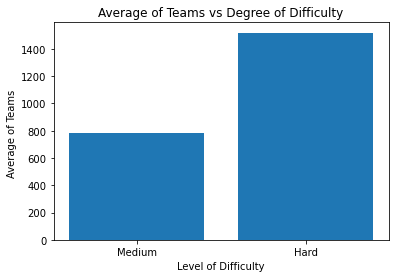

In [38]:
lvl0_teams_avg = df_diff_0['teams'].mean()
lvl1_teams_avg = df_diff_1['teams'].mean()
lvl2_teams_avg = df_diff_2['teams'].mean()
data_teams = {'Levels of Difficulty': ['Easy','Medium','Hard'],
        'Average Prize Money': [lvl0_teams_avg,lvl1_teams_avg,lvl2_teams_avg]}
df_avg_teams = pd.DataFrame(data_teams)
print(df_avg_teams)
plt.bar(df_avg_teams['Levels of Difficulty'],df_avg_teams['Average Prize Money'])
plt.xlabel("Level of Difficulty")
plt.ylabel("Average of Teams ")
plt.title("Average of Teams vs Degree of Difficulty")
plt.show

  Levels of Difficulty  Average Number of Tags
0                 Easy                     NaN
1               Medium                2.480198
2                 Hard                2.304598


<function matplotlib.pyplot.show(close=None, block=None)>

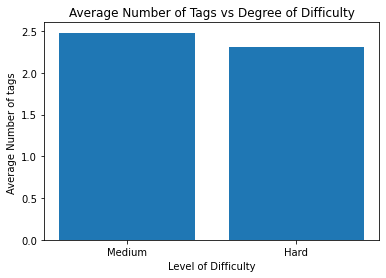

In [39]:
lvl0_tags_avg = df_diff_0['nooftags'].mean()
lvl1_tags_avg = df_diff_1['nooftags'].mean()
lvl2_tags_avg = df_diff_2['nooftags'].mean()
data_tags = {'Levels of Difficulty': ['Easy','Medium','Hard'],
        'Average Number of Tags': [lvl0_tags_avg,lvl1_tags_avg,lvl2_tags_avg]}
df_avg_tags = pd.DataFrame(data_tags)
print(df_avg_tags)
plt.bar(df_avg_tags['Levels of Difficulty'],df_avg_tags['Average Number of Tags'])
plt.xlabel("Level of Difficulty")
plt.ylabel("Average Number of tags ")
plt.title("Average Number of Tags vs Degree of Difficulty")
plt.show

  Levels of Difficulty  Average points
0                 Easy             NaN
1               Medium        0.841584
2                 Hard        1.873563


<function matplotlib.pyplot.show(close=None, block=None)>

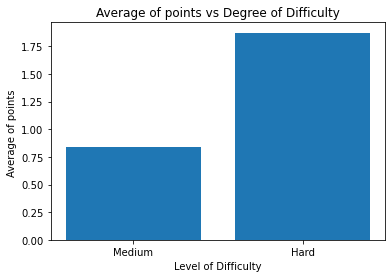

In [40]:
lvl0_points_avg = df_diff_0['points'].mean()
lvl1_points_avg = df_diff_1['points'].mean()
lvl2_points_avg = df_diff_2['points'].mean()
data_points = {'Levels of Difficulty': ['Easy','Medium','Hard'],
        'Average points': [lvl0_points_avg,lvl1_points_avg,lvl2_points_avg]}
df_avg_points = pd.DataFrame(data_points)
print(df_avg_points)
plt.bar(df_avg_points['Levels of Difficulty'],df_avg_points['Average points'])
plt.xlabel("Level of Difficulty")
plt.ylabel("Average of points ")
plt.title("Average of points vs Degree of Difficulty")
plt.show

  Levels of Difficulty  Average tiers
0                 Easy            NaN
1               Medium       0.004950
2                 Hard       0.034483


<function matplotlib.pyplot.show(close=None, block=None)>

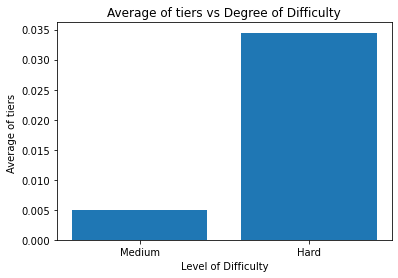

In [41]:
lvl0_tiers_avg = df_diff_0['tiers'].mean()
lvl1_tiers_avg = df_diff_1['tiers'].mean()
lvl2_tiers_avg = df_diff_2['tiers'].mean()
data_tiers = {'Levels of Difficulty': ['Easy','Medium','Hard'],
        'Average tiers': [lvl0_tiers_avg,lvl1_tiers_avg,lvl2_tiers_avg]}
df_avg_tiers= pd.DataFrame(data_tiers)
print(df_avg_tiers)
plt.bar(df_avg_tiers['Levels of Difficulty'],df_avg_tiers['Average tiers'])
plt.xlabel("Level of Difficulty")
plt.ylabel("Average of tiers ")
plt.title("Average of tiers vs Degree of Difficulty")
plt.show

### Correlation Matrix

In [42]:
df_sv.corr()

,price,launch,close,nooftags,teams,competitors,entries,files,size,points,tiers,difficulty
price,1.000000,-0.037317,-0.188201,0.065870,0.171877,0.124547,0.083500,-0.023584,-0.056823,0.184088,0.009913,0.239676
launch,-0.037317,1.000000,0.371650,-0.443471,-0.119694,-0.071318,-0.098729,-0.083087,0.098263,0.070632,-0.444333,0.063910
close,-0.188201,0.371650,1.000000,-0.309455,-0.329457,-0.211637,-0.310489,-0.142863,0.101346,-0.405625,-0.109118,-0.222338
nooftags,0.065870,-0.443471,-0.309455,1.000000,0.316162,0.166473,0.242883,0.100098,-0.041294,-0.075218,0.078417,-0.056214
teams,0.171877,-0.119694,-0.329457,0.316162,1.000000,0.611289,0.827187,-0.090334,0.011940,0.283805,-0.046324,0.300449
competitors,0.124547,-0.071318,-0.211637,0.166473,0.611289,1.000000,0.431847,-0.054772,0.034303,0.208398,-0.034871,0.186619
entries,0.083500,-0.098729,-0.310489,0.242883,0.827187,0.431847,1.000000,-0.063794,-0.013269,0.293754,-0.042107,0.244198
files,-0.023584,-0.083087,-0.142863,0.100098,-0.090334,-0.054772,-0.063794,1.000000,0.008891,-0.027325,-0.023309,-0.054525
size,-0.056823,0.098263,0.101346,-0.041294,0.011940,0.034303,-0.013269,0.008891,1.000000,0.025913,-0.028643,-0.025647
points,0.184088,0.070632,-0.405625,-0.075218,0.283805,0.208398,0.293754,-0.027325,0.025913,1.000000,0.101067,0.554568


Correlation Matrix


<AxesSubplot:>

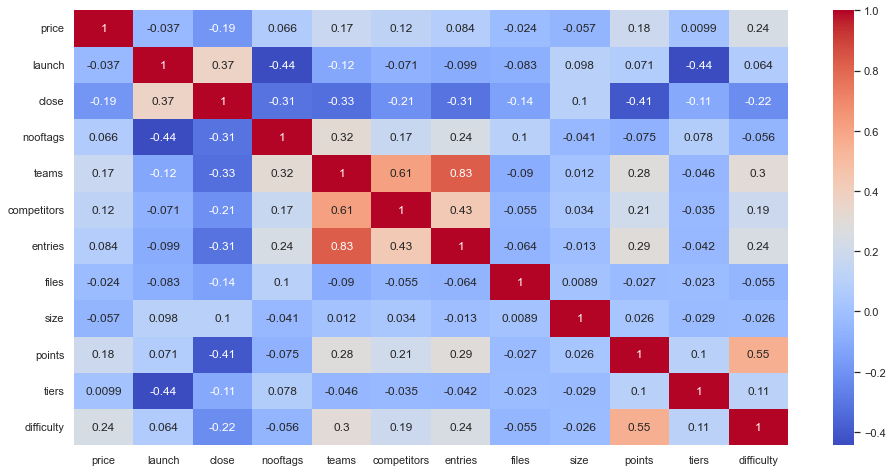

In [43]:
print('Correlation Matrix')
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df_sv.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [44]:
df_sv.head()

,title,price,launch,close,tags,nooftags,teams,competitors,entries,description,files,size,points,tiers,difficulty
0,1st and Future - Player Contact Detection,100000.0,1,0,"['health', 'tabular', 'football', 'video data'...",5,32.0,32.0,77.0,Goal of the Competition\nThe goal of this comp...,734.0,5.01,2.0,1.0,2
1,Santa 2022 - The Christmas Card Conundrum,50000.0,1,0,"['optimization', 'holidays and cultural events...",3,277.0,300.0,1078.0,"This Christmas season, we’re printing in house...",3.0,10.04,2.0,1.0,2
2,RSNA Screening Mammography Breast Cancer Detec...,50000.0,1,0,"['binary classification', 'image classificatio...",3,259.0,280.0,1524.0,Goal of the Competition\nThe goal of this comp...,54713.0,314.72,2.0,1.0,2
3,OTTO – Multi-Objective Recommender System,30000.0,2,0,"['retail and shopping', 'recommender systems',...",3,1249.0,1361.0,7526.0,Goal of the Competition\nThe goal of this comp...,3.0,11.89,2.0,1.0,2
4,Tabular Playground Series - Nov 2022,0.0,2,1,"['tabular', 'ensembling', 'logloss']",3,689.0,717.0,7260.0,You may have heard that blending predictions f...,5002.0,2.90,0.0,0.0,1


In [45]:
df_new = df_sv.drop(['title','tags','description'],axis=1)

In [46]:
df_new.head()

,price,launch,close,nooftags,teams,competitors,entries,files,size,points,tiers,difficulty
0,100000.0,1,0,5,32.0,32.0,77.0,734.0,5.01,2.0,1.0,2
1,50000.0,1,0,3,277.0,300.0,1078.0,3.0,10.04,2.0,1.0,2
2,50000.0,1,0,3,259.0,280.0,1524.0,54713.0,314.72,2.0,1.0,2
3,30000.0,2,0,3,1249.0,1361.0,7526.0,3.0,11.89,2.0,1.0,2
4,0.0,2,1,3,689.0,717.0,7260.0,5002.0,2.90,0.0,0.0,1


In [47]:
#Defining X and y
X = df_new.iloc[:,:-1]
y= df_new['difficulty']

In [48]:
X.head()

,price,launch,close,nooftags,teams,competitors,entries,files,size,points,tiers
0,100000.0,1,0,5,32.0,32.0,77.0,734.0,5.01,2.0,1.0
1,50000.0,1,0,3,277.0,300.0,1078.0,3.0,10.04,2.0,1.0
2,50000.0,1,0,3,259.0,280.0,1524.0,54713.0,314.72,2.0,1.0
3,30000.0,2,0,3,1249.0,1361.0,7526.0,3.0,11.89,2.0,1.0
4,0.0,2,1,3,689.0,717.0,7260.0,5002.0,2.90,0.0,0.0


In [49]:
y.head()

0    2
1    2
2    2
3    2
4    1
Name: difficulty, dtype: int64

In [50]:
X.shape,y.shape

((376, 11), (376,))

## Performing train_test_split

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state=42)

In [52]:
X_train.head()

,price,launch,close,nooftags,teams,competitors,entries,files,size,points,tiers
133,0.0,4,4,5,19.0,19.0,66.0,103321.0,12.73,0.0,0.0
186,25000.0,4,0,2,193.0,232.0,1566.0,100001.0,10.46,1.0,0.0
34,0.0,3,3,2,816.0,860.0,7235.0,4.0,591.38,0.0,0.0
39,0.0,3,0,3,252.0,294.0,3904.0,45834.0,71.46,0.0,0.0
298,0.0,4,0,3,441.0,491.0,771.0,9.0,12.11,1.0,0.0


In [53]:
X_train.shape,y_train.shape

((251, 11), (251,))

In [54]:
X_test.shape,y_test.shape

((125, 11), (125,))

## Model 1 - Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
classifier=LogisticRegression()

In [56]:
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
score = accuracy_score(y_pred,y_test)
print('The accuracy we get from Logistic Regression is',score)

The accuracy we get from Logistic Regression is 0.752


In [57]:
print('Classification report for Logisitic Regression \n\n',classification_report(y_pred,y_test))

Classification report for Logisitic Regression 

               precision    recall  f1-score   support

           1       0.75      0.74      0.75        62
           2       0.75      0.76      0.76        63

    accuracy                           0.75       125
   macro avg       0.75      0.75      0.75       125
weighted avg       0.75      0.75      0.75       125



## Performing GridSearch CV

In [58]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300,400]}

In [59]:
cv = GridSearchCV(classifier,param_grid = parameters,scoring = 'accuracy',cv=5)
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)

In [60]:
print('The best parameters are',cv.best_params_)

The best parameters are {'C': 5, 'max_iter': 200, 'penalty': 'l2'}


In [61]:
score = accuracy_score(y_pred,y_test)
print('The accuracy we get from Logistic Regression after using GridSearchCV is',score)

The accuracy we get from Logistic Regression after using GridSearchCV is 0.824


## Model 2 - Multinomial Naive Bayes

In [62]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_pred,y_test)
print('The accuracy we get from Multinomial NB is',score)

The accuracy we get from Multinomial NB is 0.576


In [63]:
parameters = {  
'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  
} 
cv = GridSearchCV(clf,param_grid = parameters,scoring = 'accuracy',cv=5)
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)
print('The accuracy we get from Multinomial NB after GridSearch CV is',score)

The accuracy we get from Multinomial NB after GridSearch CV is 0.576


## Model 3 - KNeighbors Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
score = accuracy_score(y_pred,y_test)
print('The accuracy we get from KNeighbors is',score)

The accuracy we get from KNeighbors is 0.68


In [65]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
cv = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)
print('The accuracy we get from KNeighbors after GridSearch CV is',score)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
The accuracy we get from KNeighbors after GridSearch CV is 0.68


## Finding the best K value

In [66]:
%%time
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


CPU times: total: 172 ms
Wall time: 267 ms


Text(0, 0.5, 'Error Rate')

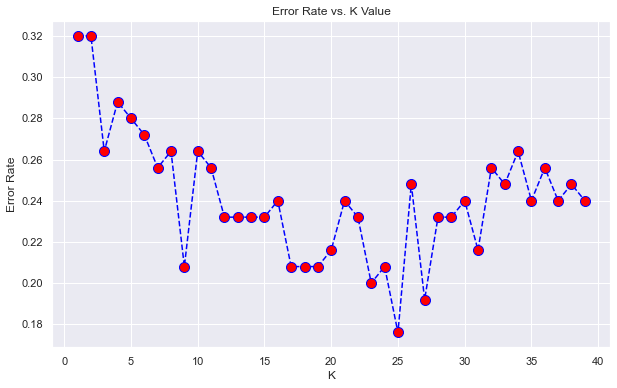

In [67]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### K = 25

In [68]:
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

score = accuracy_score(y_pred,y_test)
print('The accuracy we get from KNeighbors when K = 25 is',score)

The accuracy we get from KNeighbors when K = 25 is 0.824


## Model 4 - Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier
treemodel=DecisionTreeClassifier()
treemodel.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.561046511627907, 0.95, 'X[0] <= 22500.0\ngini = 0.492\nsamples = 251\nvalue = [141, 110]'),
 Text(0.3372093023255814, 0.85, 'X[3] <= 1.0\ngini = 0.295\nsamples = 139\nvalue = [114, 25]'),
 Text(0.20930232558139536, 0.75, 'X[2] <= 4.5\ngini = 0.484\nsamples = 51\nvalue = [30, 21]'),
 Text(0.09302325581395349, 0.65, 'X[0] <= 11500.0\ngini = 0.308\nsamples = 21\nvalue = [17, 4]'),
 Text(0.046511627906976744, 0.55, 'X[6] <= 21498.5\ngini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.023255813953488372, 0.45, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.06976744186046512, 0.45, 'X[6] <= 29010.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.046511627906976744, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09302325581395349, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.13953488372093023, 0.55, 'X[8] <= 30.465\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.11627906976744186, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.162

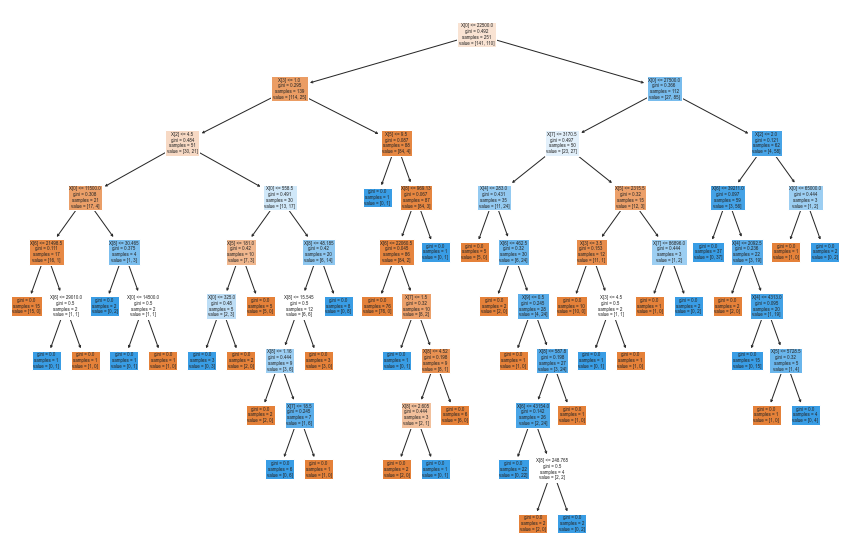

In [70]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [71]:
y_pred = treemodel.predict(X_test)
score = accuracy_score(y_pred,y_test)
print('The accuracy we get from Decision Tree Classifier is',score)

The accuracy we get from Decision Tree Classifier is 0.816


## Performing Post Prunning 

In [72]:
treemodel_prunned = DecisionTreeClassifier(max_depth = 4)
treemodel_prunned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.4732142857142857, 0.9, 'X[0] <= 22500.0\ngini = 0.492\nsamples = 251\nvalue = [141, 110]'),
 Text(0.23214285714285715, 0.7, 'X[3] <= 1.0\ngini = 0.295\nsamples = 139\nvalue = [114, 25]'),
 Text(0.14285714285714285, 0.5, 'X[2] <= 4.5\ngini = 0.484\nsamples = 51\nvalue = [30, 21]'),
 Text(0.07142857142857142, 0.3, 'X[0] <= 11500.0\ngini = 0.308\nsamples = 21\nvalue = [17, 4]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.21428571428571427, 0.3, 'X[0] <= 558.5\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.1, 'gini = 0.42\nsamples = 20\nvalue = [6, 14]'),
 Text(0.32142857142857145, 0.5, 'X[5] <= 9.5\ngini = 0.087\nsamples = 88\nvalue = [84, 4]'),
 Text(0.2857142857142857, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.35714285714285715, 0.3, 'X[8] <= 969.13\n

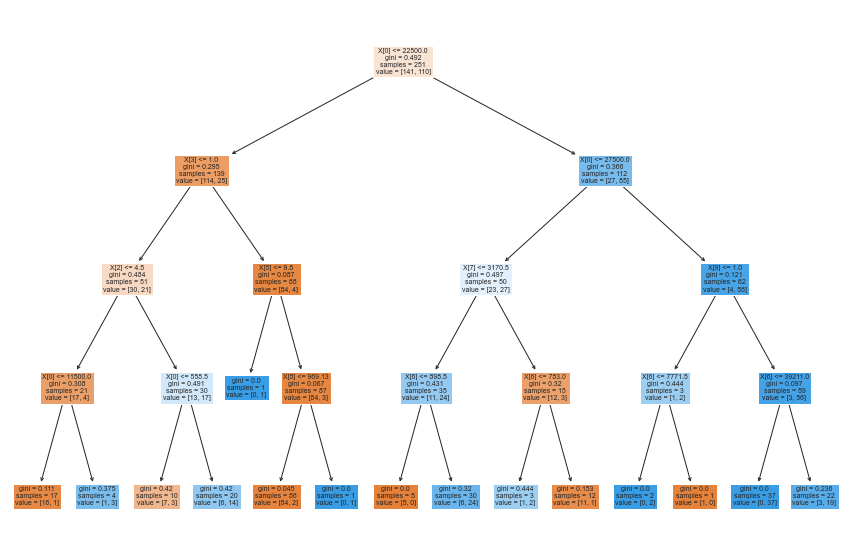

In [73]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel_prunned,filled=True)

In [74]:
y_pred = treemodel_prunned.predict(X_test)
score = accuracy_score(y_pred,y_test)
print('The accuracy we get from Decision Tree Classifier after post prunning is',score)

The accuracy we get from Decision Tree Classifier after post prunning is 0.856


## Performing Preprunning

In [75]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7],
  'max_features':['auto', 'sqrt', 'log2']
    
}

treemodel_preprunned=DecisionTreeClassifier()
cv=GridSearchCV(treemodel_preprunned,param_grid=parameter,cv=5,scoring='accuracy')
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)
score = accuracy_score(y_pred,y_test)
print('The accuracy we get from Decision Tree Classifier after pre prunning is',score)
print('The best parameters are',cv.best_params_)

The accuracy we get from Decision Tree Classifier after pre prunning is 0.752
The best parameters are {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'splitter': 'best'}


## Model 5 - SVC

In [76]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
score = accuracy_score(y_pred,y_test)
print('The accuracy we get from SVC is',score)

The accuracy we get from SVC is 0.616


In [77]:
# from sklearn.model_selection import RandomizedSearchCV
# parameter = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'poly','sigmoid','linear']}
# cv=RandomizedSearchCV(estimator = classifier, param_distributions = parameter, n_iter = 3, random_state = 42)
# cv.fit(X_train,y_train)
# y_pred = cv.predict(X_test) 
# score = accuracy_score(y_pred,y_test)
# print(score)

## Model 6 - RandomForest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
score = accuracy_score(y_pred,y_test)
print('The accuracy we get from Random Forest Classifier is',score)

The accuracy we get from Random Forest Classifier is 0.88


## Performing GridSearchCV

In [79]:
parameter={
  'n_estimators':[100,200,300,400,500],  
 'criterion':['gini','entropy','log_loss'],
  'max_depth':[1,2,3,4,5,6,7],
  'max_features':['auto', 'sqrt', 'log2']
    
}
classifier = RandomForestClassifier()
cv=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)
score = accuracy_score(y_pred,y_test)
print('The accuracy we get from Random Forest Classifier after GridSearch CV is',score)
print('The best parameters are',cv.best_params_)

The accuracy we get from Random Forest Classifier after GridSearch CV is 0.888
The best parameters are {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 500}


## Predicting popularity

In [80]:
df_reg = df_sv.drop(['title','tags','description','teams','competitors'],axis=1)
df_reg.head()

,price,launch,close,nooftags,entries,files,size,points,tiers,difficulty
0,100000.0,1,0,5,77.0,734.0,5.01,2.0,1.0,2
1,50000.0,1,0,3,1078.0,3.0,10.04,2.0,1.0,2
2,50000.0,1,0,3,1524.0,54713.0,314.72,2.0,1.0,2
3,30000.0,2,0,3,7526.0,3.0,11.89,2.0,1.0,2
4,0.0,2,1,3,7260.0,5002.0,2.90,0.0,0.0,1


In [81]:
y = df_reg['entries']
X = df_reg.drop(['entries'],axis=1)

In [82]:
X.head()

,price,launch,close,nooftags,files,size,points,tiers,difficulty
0,100000.0,1,0,5,734.0,5.01,2.0,1.0,2
1,50000.0,1,0,3,3.0,10.04,2.0,1.0,2
2,50000.0,1,0,3,54713.0,314.72,2.0,1.0,2
3,30000.0,2,0,3,3.0,11.89,2.0,1.0,2
4,0.0,2,1,3,5002.0,2.90,0.0,0.0,1


In [83]:
y.head()

0      77.0
1    1078.0
2    1524.0
3    7526.0
4    7260.0
Name: entries, dtype: float64

In [84]:
X.shape,y.shape

((376, 9), (376,))

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

In [86]:
X_train.shape,y_train.shape

((282, 9), (282,))

In [87]:
X_test.shape,y_test.shape

((94, 9), (94,))

In [88]:
import sklearn.metrics as metrics
import math
from sklearn.metrics import median_absolute_error

#Defining a function for root mean-squared-error
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

#A single function for calculating all the relevant metrics
def print_score(m):
    res = [rmse(m.predict(X_train), y_train),rmse(m.predict(X_test), y_test),
           m.score(X_train,y_train), m.score(X_test,y_test),
           median_absolute_error(m.predict(X_train),y_train), median_absolute_error(m.predict(X_test),y_test),
           metrics.mean_absolute_error(m.predict(X_train),y_train), metrics.mean_absolute_error(m.predict(X_test),y_test)]
    
    print('RMSE Train:',res[0],'\nRMSE Test:',res[1],'\nScore Train:',res[2],'\nScore Test:',res[3],
          '\nMedAE Train:',res[4],'\nMedAE Test:',res[5],'\nMeanAE Train:',res[6],'\nMeanAE Test:',res[7])


In [89]:
#Visualize importance of the features

def visualize_importance(feature_importances, feat_train_df):
    feature_importance_df = pd.DataFrame()
    #creating dataframe for feature name and feature importance
    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df,_df],
                                     axis=0,ignore_index = True)
    #grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column').sum()[['feature_importance']]\
            .sort_values('feature_importance',ascending=False).index[:50]
    
    #Plotting the data using boxenplot
    fig,ax = plt.subplots(figsize=(8,max(6,len(order)* .25)))
    sns.boxenplot(data=feature_importance_df,
                  x='feature_importance',
                  y='column',
                  order = order,
                  ax=ax,
                  palette='viridis',
                  orient='h')
    ax.tick_params(axis='x',rotation=0)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    
    return fig, ax

## Model 1 - Linear Regression

RMSE Train: 19749.33511539601 
RMSE Test: 18411.442656983018 
Score Train: 0.18341530993726918 
Score Test: 0.25643111024948806 
MedAE Train: 9306.004140851688 
MedAE Test: 8633.139653924834 
MeanAE Train: 13362.765927427003 
MeanAE Test: 12466.586673177073
CPU times: total: 406 ms
Wall time: 84.2 ms


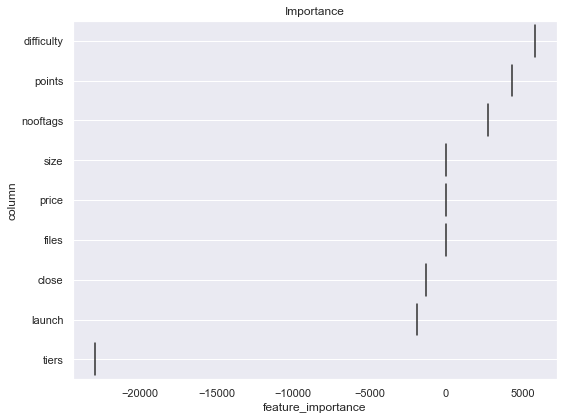

In [90]:
%%time

from sklearn.linear_model import LinearRegression

linearModel = LinearRegression()

linearModel.fit(X_train,y_train)

print_score(linearModel)

fig,ax = visualize_importance(linearModel.coef_,X_train)

## Model 2 - Random Forest Regressor

RMSE Train: 8368.537638342734 
RMSE Test: 20604.74462590988 
Score Train: 0.85337925484409 
Score Test: 0.06872049747434539 
MedAE Train: 2889.125 
MedAE Test: 8885.14 
MeanAE Train: 5326.781211583924 
MeanAE Test: 14043.20872340426
CPU times: total: 188 ms
Wall time: 325 ms


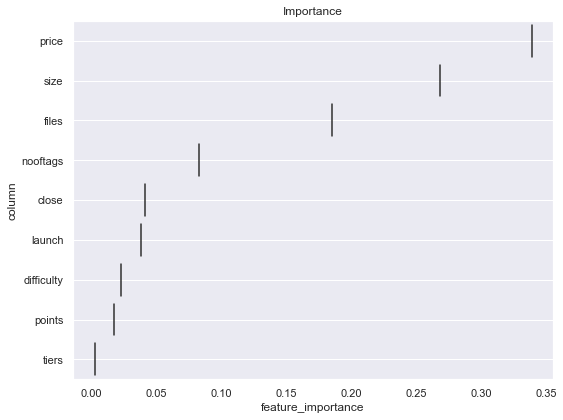

In [91]:
%%time

from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()

rf.fit(X_train,y_train)

print_score(rf)

fig,ax = visualize_importance(rf.feature_importances_,X_train)

## Model 3

In [92]:
%%time

from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor()

knnr.fit(X_train,y_train)

print_score(knnr)


RMSE Train: 18072.673896060132 
RMSE Test: 20279.21999783092 
Score Train: 0.3161811011462471 
Score Test: 0.09791374616160964 
MedAE Train: 7995.2 
MedAE Test: 6861.400000000001 
MeanAE Train: 12011.651773049645 
MeanAE Test: 13045.359574468088
CPU times: total: 15.6 ms
Wall time: 17.7 ms


## Model 4

RMSE Train: 10429.347751952891 
RMSE Test: 19694.59455710087 
Score Train: 0.7722750726914069 
Score Test: 0.14917613911259464 
MedAE Train: 4909.717968400472 
MedAE Test: 8003.385109083987 
MeanAE Train: 7299.104210470048 
MeanAE Test: 12879.456955565145
CPU times: total: 78.1 ms
Wall time: 117 ms


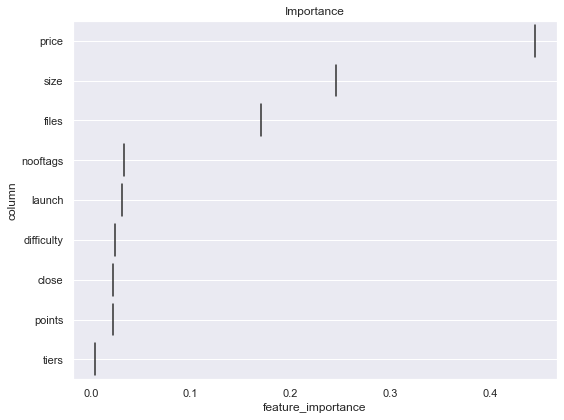

In [93]:
%%time

from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()

GBR.fit(X_train,y_train)

print_score(GBR)

fig, ax = visualize_importance(GBR.feature_importances_,X_train)

## Model 5

RMSE Train: 935.6381748978828 
RMSE Test: 23205.482576689097 
Score Train: 0.9981672123866706 
Score Test: -0.18120908992637164 
MedAE Train: 0.0 
MedAE Test: 9320.5 
MeanAE Train: 89.29078014184397 
MeanAE Test: 15270.72340425532
CPU times: total: 125 ms
Wall time: 164 ms


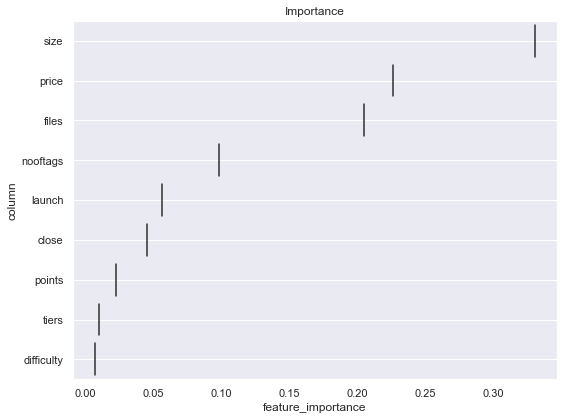

In [94]:
%%time

from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()

DTR.fit(X_train,y_train)

print_score(DTR)

fig, ax = visualize_importance(DTR.feature_importances_,X_train)

## Model 6

RMSE Train: 16478.801129034335 
RMSE Test: 20278.3529100504 
Score Train: 0.43147770567999244 
Score Test: 0.09799088633224529 
MedAE Train: 9807.583333333334 
MedAE Test: 11553.176567656767 
MeanAE Train: 13133.229837214307 
MeanAE Test: 15196.10256407527
CPU times: total: 125 ms
Wall time: 172 ms


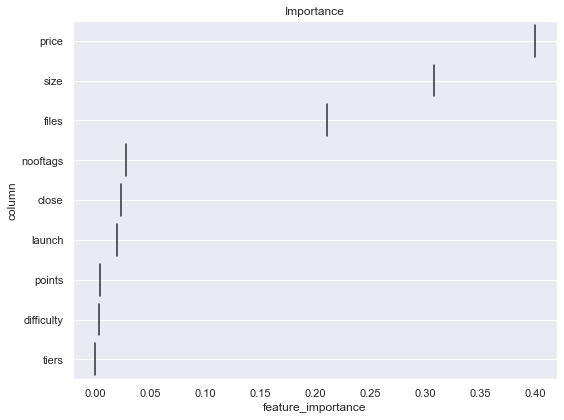

In [95]:
%%time

from sklearn.ensemble import AdaBoostRegressor

ADB = AdaBoostRegressor()

ADB.fit(X_train,y_train)

print_score(ADB)

fig, ax = visualize_importance(ADB.feature_importances_,X_train)

## Model 7

RMSE Train: 977.7946999581476 
RMSE Test: 22696.68748562471 
Score Train: 0.9979983339067584 
Score Test: -0.12997940299763866 
MedAE Train: 99.4296875 
MedAE Test: 6820.823486328125 
MeanAE Train: 272.7120622151287 
MeanAE Test: 14535.922775268555
CPU times: total: 1.92 s
Wall time: 202 ms


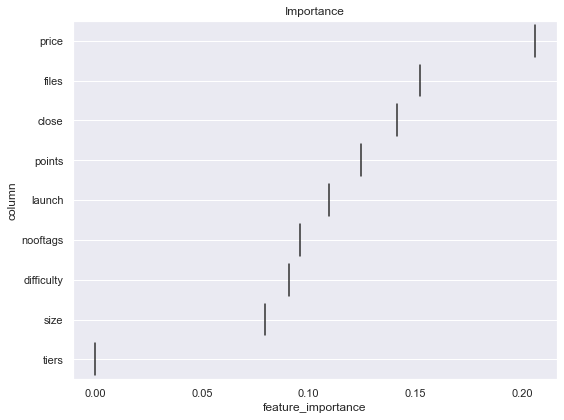

In [96]:
%%time

from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(X_train,y_train)

print_score(xgb)

fig,ax = visualize_importance(xgb.feature_importances_,X_train)

## RandomizedSearch CV

In [97]:
#Using random grid to search for best best hyperparameters
from sklearn.model_selection import RandomizedSearchCV
def random_Search(model,X_train,Y_train,param_grid):
    
    #3 cross folds, 100 different combinations and use all available cores
    random = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 20, random_state = 42)
    random.fit(X_train,Y_train)
    print('\nBest Parameters: ',random.best_params_)


In [98]:
from numpy import *
#%%time
#create params dict in List for tuning
rf_para_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 400, num = 3)],
    'max_features': ['auto','sqrt'],
    'max_depth': [int(x) for x in linspace(10,110, num = 3)],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2],
    'bootstrap': [True,False]
}
#passing data for hyper parameter tuning with RandomSearchCV
random_Search(RandomForestRegressor(),X_train,y_train, param_grid=rf_para_grid)


Best Parameters:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


RMSE Train: 13407.737667333078 
RMSE Test: 18740.481545413382 
Score Train: 0.6236366868758424 
Score Test: 0.22961633797482928 
MedAE Train: 4939.96831378601 
MedAE Test: 6988.310608141046 
MeanAE Train: 8493.605571302955 
MeanAE Test: 12406.636686371583
CPU times: total: 609 ms
Wall time: 672 ms


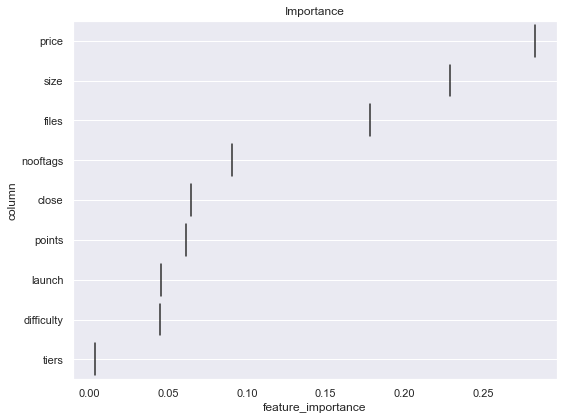

In [99]:
%%time

from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor(**{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True})

rf.fit(X_train,y_train)

print_score(rf)

fig,ax = visualize_importance(rf.feature_importances_,X_train)

In [100]:
%%time
#create parameters dict in list for tuning
knn_para_grid = {
    'leaf_size': list(range(1,20)),
    'n_neighbors': list(range(1,30)),
    'p': [1,2]
}
#passing data for hyper parameter tuning with RandomSearchCV
random_Search(KNeighborsRegressor(),X_train,y_train,param_grid = knn_para_grid)


Best Parameters:  {'p': 1, 'n_neighbors': 24, 'leaf_size': 17}
CPU times: total: 359 ms
Wall time: 422 ms


In [110]:
%%time

from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor(**{'p': 1, 'n_neighbors': 24, 'leaf_size': 17})

knnr.fit(X_train,y_train)

print_score(knnr)

RMSE Train: 19750.292190315784 
RMSE Test: 19213.303589727697 
Score Train: 0.1833361628005018 
Score Test: 0.19025241414985172 
MedAE Train: 8837.333333333332 
MedAE Test: 7855.104166666667 
MeanAE Train: 13616.66755319149 
MeanAE Test: 13078.325354609928
CPU times: total: 0 ns
Wall time: 16.6 ms


In [102]:
%%time
#create parameters dict in list for tuning
Ada_para_grid = {
    'n_estimators': [10,50,100],
    'learning_rate': [0.0001,0.001,0.01]
}
#passing data
random_Search(AdaBoostRegressor(),X_train,y_train,param_grid = Ada_para_grid)


Best Parameters:  {'n_estimators': 10, 'learning_rate': 0.0001}
CPU times: total: 2.86 s
Wall time: 3.17 s


RMSE Train: 18867.093864092483 
RMSE Test: 19241.370289403654 
Score Train: 0.25474260350591993 
Score Test: 0.18788493560540298 
MedAE Train: 7482.5 
MedAE Test: 7312.148148148148 
MeanAE Train: 12337.859218558806 
MeanAE Test: 12745.824362500332
CPU times: total: 31.2 ms
Wall time: 82 ms


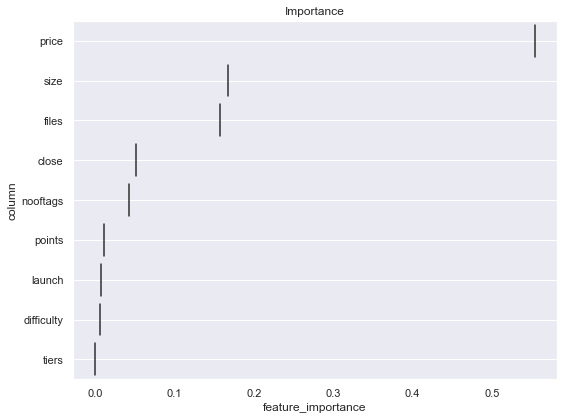

In [109]:
%%time

from sklearn.ensemble import AdaBoostRegressor

ADB = AdaBoostRegressor(**{'n_estimators': 10, 'learning_rate': 0.001})

ADB.fit(X_train,y_train)

print_score(ADB)

fig, ax = visualize_importance(ADB.feature_importances_,X_train)

In [104]:
%%time
#create parameters dict in list for tuning
XGB_para_grid = {
    'learning_rate': [0.05,0.1,0.15],
    'max_depth' :[3,4,5],
    'min_child_weight': [1,3],
    'gamma': [0.0,0.1],
    'colsample_bytree': [0.3,0.4]
}
#passing data
random_Search(XGBRegressor(),X_train,y_train,param_grid = XGB_para_grid)


Best Parameters:  {'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.3}
CPU times: total: 25.3 s
Wall time: 3.91 s


RMSE Train: 15531.451940138555 
RMSE Test: 18831.771641703668 
Score Train: 0.49496626469338323 
Score Test: 0.22209255123454608 
MedAE Train: 6459.96337890625 
MedAE Test: 8694.51025390625 
MeanAE Train: 10530.5414576429 
MeanAE Test: 12747.388129051695
CPU times: total: 1.61 s
Wall time: 128 ms


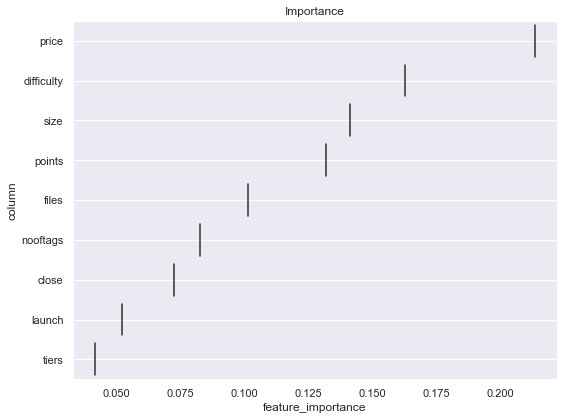

In [105]:
%%time

from xgboost import XGBRegressor

xgb = XGBRegressor(**{'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.3})

xgb.fit(X_train,y_train)

print_score(xgb)

fig,ax = visualize_importance(xgb.feature_importances_,X_train)

In [106]:
%%time
#create parameters dict in list for tuning
GBR_para_grid = {
    'n_estimators': [10,50,100],
    'learning_rate': [0.1,0.2],
    'max_depth': [x for x in range(5,8)],
    'min_samples_split': [x for x in range(2,6)]
}
#passing data
random_Search(GradientBoostingRegressor(),X_train,y_train,param_grid = GBR_para_grid)


Best Parameters:  {'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 5, 'learning_rate': 0.1}
CPU times: total: 2.81 s
Wall time: 3.03 s


RMSE Train: 14861.889697465622 
RMSE Test: 20644.563630730467 
Score Train: 0.537571766226468 
Score Test: 0.06511759386539884 
MedAE Train: 7323.436688437764 
MedAE Test: 8202.731008341598 
MeanAE Train: 10582.649066089214 
MeanAE Test: 13769.684190840951
CPU times: total: 15.6 ms
Wall time: 65.4 ms


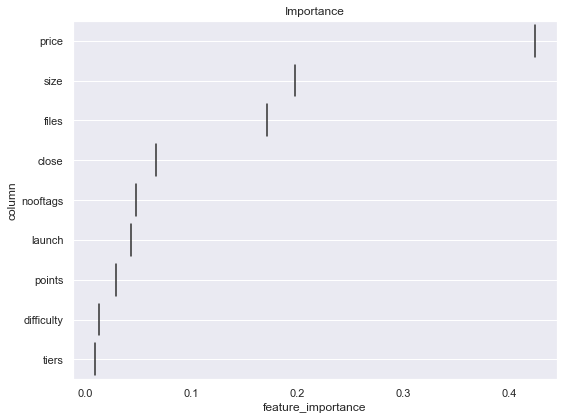

In [108]:
%%time

from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(**{'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 5, 'learning_rate': 0.1})

GBR.fit(X_train,y_train)

print_score(GBR)

fig, ax = visualize_importance(GBR.feature_importances_,X_train)

## Topic modelling

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
import spacy
import nltk
import string

In [35]:
df_sv.head()

,title,price,launch,close,tags,nooftags,teams,competitors,entries,description,files,size,points,tiers,difficulty
0,1st and Future - Player Contact Detection,100000.0,1,0,"['health', 'tabular', 'football', 'video data'...",5,32.0,32.0,77.0,Goal of the Competition\nThe goal of this comp...,734.0,5.01,2.0,1.0,2
1,Santa 2022 - The Christmas Card Conundrum,50000.0,1,0,"['optimization', 'holidays and cultural events...",3,277.0,300.0,1078.0,"This Christmas season, we’re printing in house...",3.0,10.04,2.0,1.0,2
2,RSNA Screening Mammography Breast Cancer Detec...,50000.0,1,0,"['binary classification', 'image classificatio...",3,259.0,280.0,1524.0,Goal of the Competition\nThe goal of this comp...,54713.0,314.72,2.0,1.0,2
3,OTTO – Multi-Objective Recommender System,30000.0,2,0,"['retail and shopping', 'recommender systems',...",3,1249.0,1361.0,7526.0,Goal of the Competition\nThe goal of this comp...,3.0,11.89,2.0,1.0,2
4,Tabular Playground Series - Nov 2022,0.0,2,1,"['tabular', 'ensembling', 'logloss']",3,689.0,717.0,7260.0,You may have heard that blending predictions f...,5002.0,2.90,0.0,0.0,1


In [41]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
nlp = spacy.load("en_core_web_sm")
stop = list(stopwords.words('english')) + ['Goal', 'of', 'the', 'competition', 'description', 'task', 'kaggle', 'problem', 'statement', 'introduction']
description = df_sv['description'].apply(lambda x: x.lower())
tokenised = []
wordnet_lemmatizer = WordNetLemmatizer()
for d in description:
    token = token = nltk.word_tokenize(d)
    token = [t for t in token if t]
    token = [t for t in token if t not in string.punctuation]
    parts = [(t, nlp(t)[0].pos_) for t in token]
    pos = []
    for p in enumerate(parts):
        if p[1][1] in ['ADJ']:
            pos.append((p[1][0], wordnet.ADJ))
        elif p[1][1] in ['VERB']:
            pos.append((p[1][0], wordnet.VERB))
        elif p[1][1] in ['ADV']:
            pos.append((p[1][0], wordnet.ADV))
        else:
            pos.append((p[1][0], wordnet.NOUN))
    token = [wordnet_lemmatizer.lemmatize(t, pos = 'v') for t in token]
    tokenised.append(token)
desc = []
for t in tokenised:
    x = ' '.join(s for s in t)
    desc.append(x)
print(desc)

["goal of the competition the goal of this competition be to detect external contact experience by players during an nfl football game you will use video and player track data to identify moments with contact to help improve player safety context the national football league nfl have team up with amazon web service aws to strengthen its commitment to predict player injuries the nfl aspire to have the best injury surveillance and mitigation program in any sport with your machine learn and computer vision skills you can help the nfl accurately identify when players experience contact throughout a football play in prior years the nfl challenge the kaggle community to create helmet impact detection and identification algorithms this year the nfl look to automatically identify all moments when players experience contact this competition will be successful if we can reliably detect moments when players be in contact with one another and when a player ’ s body be in contact with the grind cur

In [59]:
len(tokenised)

376

In [42]:
stop = list(stopwords.words('english')) + ['Goal', 'of', 'the', 'competition', 'description', 'task', 'kaggle', 'problem', 'statement', 'introduction']
description = df_sv['description'].apply(lambda x: x.lower())
tf_vectorizer = CountVectorizer(min_df=5, stop_words=stop)
tf = tf_vectorizer.fit_transform(desc)
tf_feature_names = tf_vectorizer.get_feature_names()
print(tf_feature_names)
print(tf.shape)

['000', '10', '100', '1000', '11', '12', '14', '15', '150', '16', '18', '19', '1st', '20', '200', '2000', '2004', '2008', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '22', '24', '25', '250', '28', '30', '300', '31', '3d', '3rd', '40', '400', '50', '500', '5000', '60', '80', '8th', '90', 'ability', 'able', 'academic', 'academies', 'accelerate', 'accelerator', 'accept', 'access', 'accessible', 'accord', 'account', 'accuracy', 'accurate', 'accurately', 'achieve', 'acknowledge', 'acknowledgements', 'acknowledgments', 'acquire', 'across', 'act', 'action', 'active', 'activities', 'activity', 'actual', 'actually', 'ad', 'adapt', 'add', 'addition', 'additional', 'additionally', 'address', 'administration', 'adopt', 'advance', 'advancements', 'advantage', 'aerial', 'affect', 'affiliate', 'age', 'agency', 'aggregate', 'ago', 'agree', 'agreement', 'agriculture', 'ahead', 'ai', 'aid', 'aim', 'air', 'al', 'alert', 'algorithm', 'algorithms'

In [43]:
num_topics = 5
X_train, X_test = train_test_split(tf, test_size=0.1, random_state=0)
lda = LatentDirichletAllocation(n_components=num_topics, 
                                max_iter=30,verbose=1,
                                evaluate_every=1, n_jobs=1,
                                random_state=0).fit(X_train)

iteration: 1 of max_iter: 30, perplexity: 1192.9914
iteration: 2 of max_iter: 30, perplexity: 1091.8672
iteration: 3 of max_iter: 30, perplexity: 1059.2932
iteration: 4 of max_iter: 30, perplexity: 1039.0113
iteration: 5 of max_iter: 30, perplexity: 1024.3264
iteration: 6 of max_iter: 30, perplexity: 1014.1062
iteration: 7 of max_iter: 30, perplexity: 1006.8848
iteration: 8 of max_iter: 30, perplexity: 1001.4938
iteration: 9 of max_iter: 30, perplexity: 997.2261
iteration: 10 of max_iter: 30, perplexity: 993.8357
iteration: 11 of max_iter: 30, perplexity: 990.9235
iteration: 12 of max_iter: 30, perplexity: 988.4193
iteration: 13 of max_iter: 30, perplexity: 986.4434
iteration: 14 of max_iter: 30, perplexity: 984.6319
iteration: 15 of max_iter: 30, perplexity: 983.1614
iteration: 16 of max_iter: 30, perplexity: 981.9782
iteration: 17 of max_iter: 30, perplexity: 981.0246
iteration: 18 of max_iter: 30, perplexity: 980.2194
iteration: 19 of max_iter: 30, perplexity: 979.5277
iteration: 20

In [44]:
num_top_words = 20
for topic_idx, topic in enumerate(lda.components_):
    print ("Topic %d:" % (topic_idx))
    # print out top 20 words per topic 
    words = [(tf_feature_names[i],'%.2f'%topic[i]) \
           for i in topic.argsort()[::-1][0:num_top_words]]
    print(words)
    print("\n")

Topic 0:
[('challenge', '181.99'), ('image', '129.58'), ('set', '80.95'), ('dataset', '75.95'), ('open', '72.38'), ('object', '72.07'), ('code', '70.21'), ('make', '65.11'), ('data', '60.33'), ('forecast', '55.44'), ('covid', '53.99'), ('19', '53.75'), ('rat', '51.30'), ('question', '49.29'), ('train', '47.30'), ('two', '45.71'), ('game', '44.39'), ('test', '43.38'), ('include', '43.14'), ('available', '40.05')]


Topic 1:
[('data', '296.47'), ('image', '164.29'), ('challenge', '144.33'), ('dataset', '132.17'), ('use', '129.74'), ('research', '122.62'), ('train', '95.49'), ('model', '93.63'), ('machine', '92.22'), ('learn', '90.01'), ('science', '82.52'), ('user', '79.14'), ('set', '77.64'), ('test', '77.45'), ('information', '75.37'), ('make', '69.10'), ('large', '61.41'), ('species', '59.81'), ('time', '57.56'), ('provide', '55.22')]


Topic 2:
[('data', '318.04'), ('use', '217.19'), ('model', '211.42'), ('help', '145.44'), ('learn', '145.00'), ('build', '107.91'), ('predict', '104.2

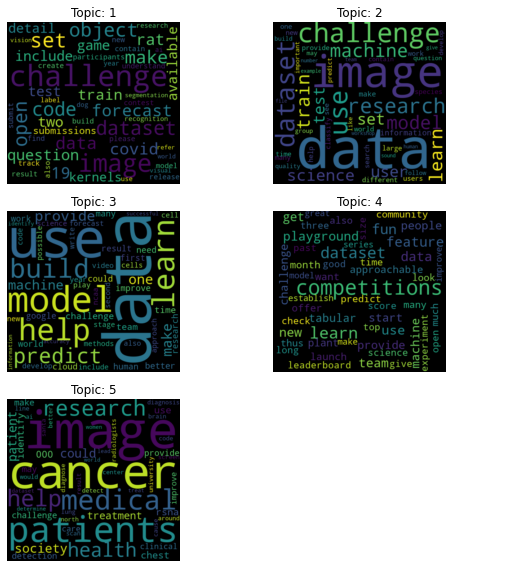

In [45]:
num_top_words = 50
f, axarr = plt.subplots(3,2, figsize = (8, 8));
axarr[2,1].axis('off')
for topic_idx, topic in enumerate(lda.components_):
    f = {tf_feature_names[i]:topic[i] for i in topic.argsort()[::-1][0:num_top_words]}
    wordcloud = WordCloud(width = 480, height = 450, margin = 0, background_color = "black");
    _ = wordcloud.generate_from_frequencies(frequencies = f);
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].imshow(wordcloud, interpolation = "bilinear");
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].set_title("Topic: " + str(topic_idx+1));
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].axis('off')

plt.tight_layout()
plt.show()